# OpenCV: Basic Operations

### Overview of Content
- [Import libraries](#Import-libraries)
- [Read and display](#Read-and-display)
- [Explore some other functions](#Explore-some-other-functions)
- [Write your image to a file](#Write-your-image-to-a-file)
- [Note on copying](#Note-on-copying)
- [References and documentation](#References-and-documentation)

### Import libraries

In [1]:
# import the OpenCV library
import cv2  

# import other useful libraries 
import numpy as np
import matplotlib.pyplot as plt

### Read and display
We're going to use the **OpenCV library to read the image** and **Matplotlib's library to display the image**

[]

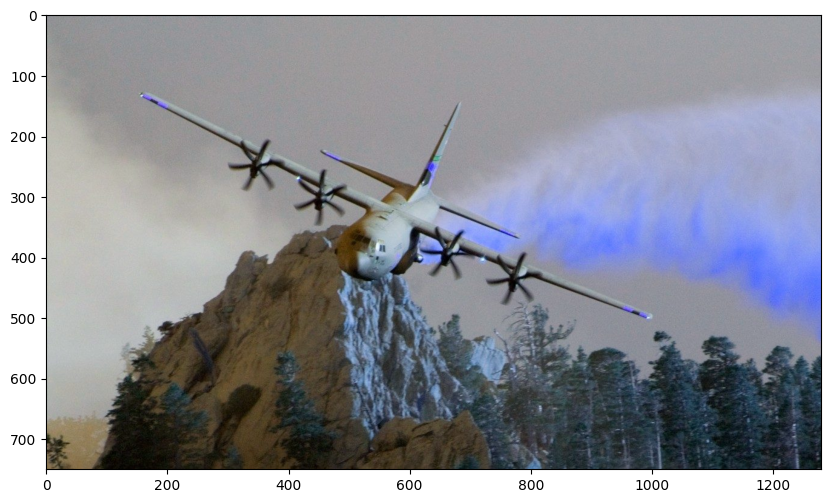

In [2]:
# read and display your image 
image = cv2.imread('c130_hercules.jpg')
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.plot()

If you open 'c130_hercules.jpg,' you will see that this display isn't quite right. ***The cloud should be red, not blue***, along with some other pigmentation differences.

Why does this happen?
> Colored images are made up of three matrices:  
> 1. Red matrix: each pixel in the image is assigned an intensity level of red (from 0 to 255) 
> 2. Green matrix: each pixel in the image is assigned an intensity level of green (from 0 to 255) 
> 3. Blue matrix: each pixel in the image is assigned an intensity level of blue (from 0 to 255)  

> These matrices are mixed together to display your colored image. Instead of processing these matrices in the typical order (Red-Green-Blue), OpenCV processes images in a different order: Blue-Green-Red. OpenCV's reversal is what alters the coloring of your image.

How do we fix it?
> All we have to do is convert from OpenCV's default Blue-Green-Red to the typical Red-Green-Blue! You can see in the code below - 

[]

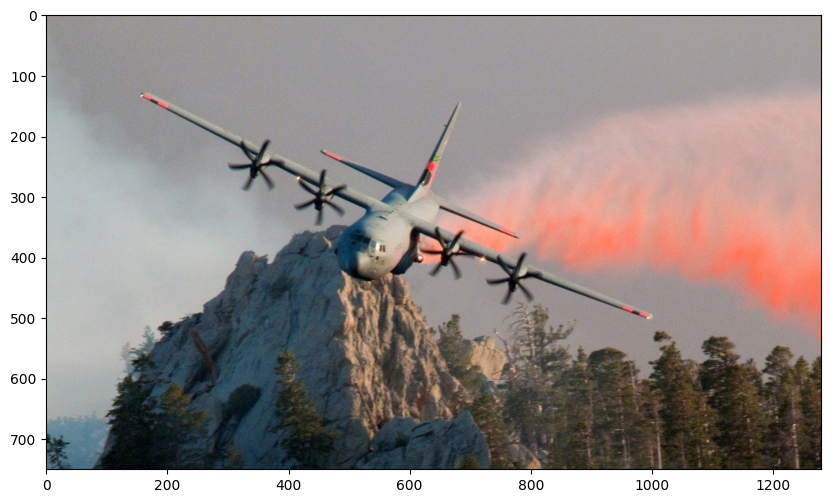

In [3]:
# read and display your image with accurate colors 
image_corrected = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
plt.figure(figsize=(10,10))
plt.imshow(image_corrected)
plt.plot()

Now let's look at our image in grayscale. It's important to note that here, there is only ***one color channel***, as opposed to the three in colored images. Due to this, there is also only ***one matrix***. Each item in this matrix represents the whiteness of the corresponding pixel, with 0 being black and 255 being white. 

[]

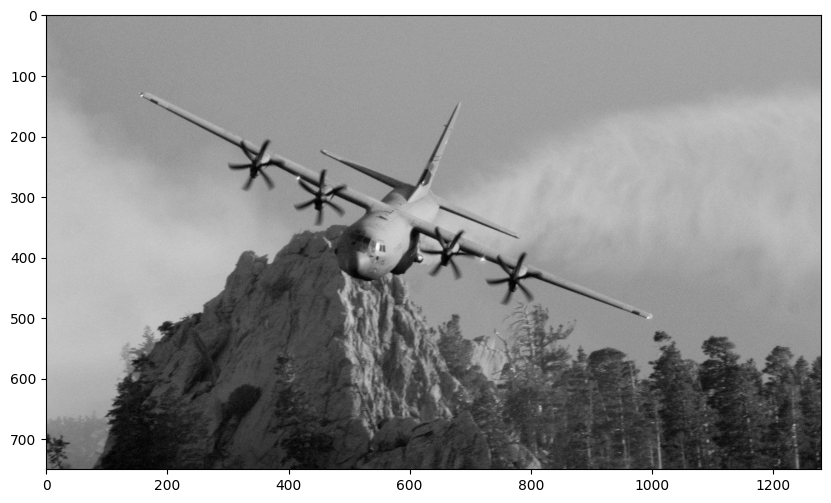

In [4]:
# read and display your image in grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10,10))
plt.imshow(image_gray, cmap='gray')
plt.plot()

### Explore some other functions

You can find the **shape** your image 
- The first tuple element corresponds to the number of rows of pixels in the image
- The second tuple element corresponds to the number of columns of pixels in the image 
- What about the third tuple element? Notice in the code below how the ***colored image has three elements*** in its tuple, while the ***greyscale image only has two***. This is because the third tuple element corresponds to the number of color channels
    - In a colored image, there are three color channels: red, blue, and green. So, the entry is 3.
    - In a greyscale image, there is only one color channel: white. Each pixel value denotes the level of whiteness at that particular spot. Due to this, there is not a third tuple entry.

In [5]:
image_corrected.shape

(750, 1280, 3)

In [6]:
image_gray.shape

(750, 1280)

---

You can find the **max** and **min** values of your image. See below - 

In [19]:
print("The highest intensity level: ", image_corrected.max())
print("The lowest intensity level: ", image_corrected.min())

The highest intensity level:  255
The lowest intensity level:  0


Remember that each color channel ranges from 0 to 255? Due to this, we can find the lowest and highest color intensities of each channel. Let's look for the highest of each - 

In [20]:
print("The reddest our image gets: ", image_corrected[:,:,0].max()) 
print("The greenest our image gets: ", image_corrected[:,:,1].max())
print("The bluest our image gets: ", image_corrected[:,:,2].max())

The reddest our image gets:  255
The greenest our image gets:  255
The bluest our image gets:  241


As you might guess, the max and min applies to grayscale images too - 

In [21]:
print("The whitest our grayscale image gets:", image_gray.max())
print("The least white (aka. blackest) our grayscale iamge gets:", image_gray.min())

The whitest our grayscale image gets: 253
The least white (aka. blackest) our grayscale iamge gets: 0


---

You can use **indexing** to access the **columns**, **rows**, and **color channels** of your image
> The synatx: 
*image name*[ *row range*, *column range*, *color channel*]

First, let's specify the range of rows  we want to see: 

Accessing the top rows...


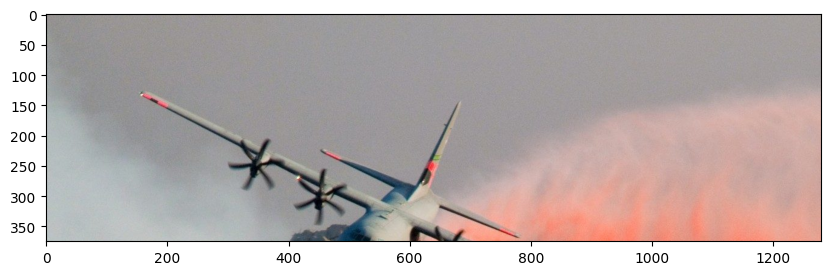

In [9]:
print("Accessing the top rows...")
top_half = image_corrected[0:375,:,]
plt.figure(figsize=(10,10))
plt.imshow(top_half)
plt.show()

Now, let's specify the columns we want to see: 

Accessing the right columns...


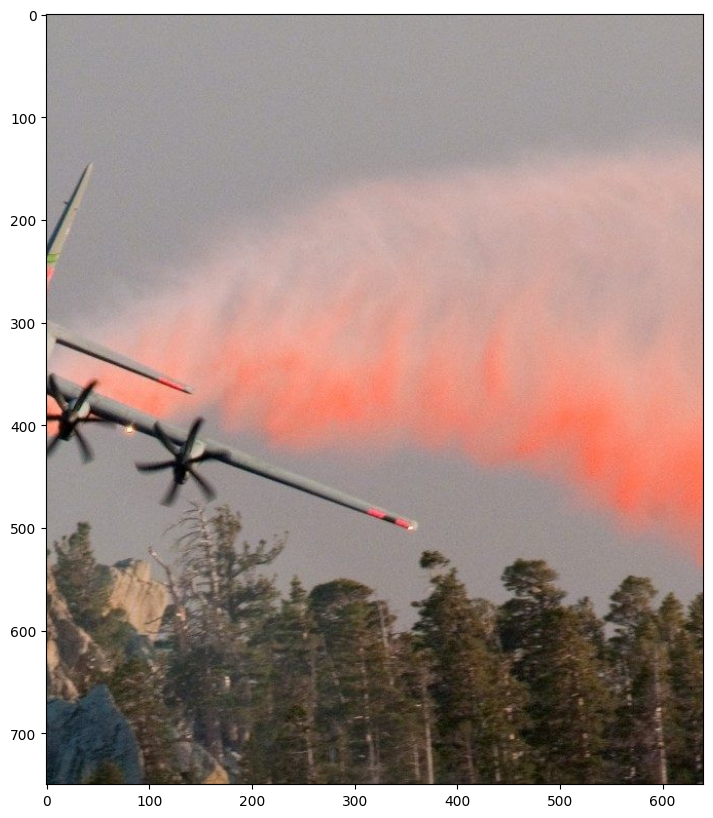

In [10]:
print("Accessing the right columns...")
right_half = image_corrected[:,640:1280,]
plt.figure(figsize=(10,10))
plt.imshow(right_half)
plt.show()

We can even specify the color channel we want to see! 

Accessing the red channel...


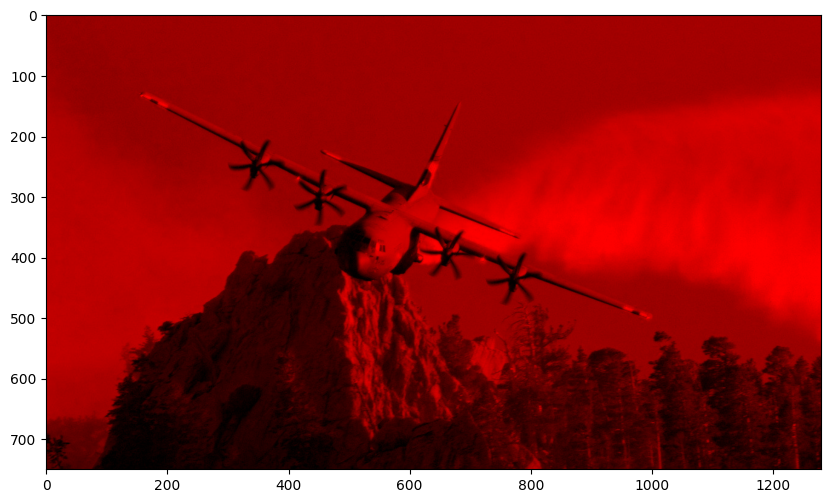

In [11]:
print("Accessing the red channel...")

# Grab a copy of our image 
image_red = image_corrected.copy()

# Set the green and blue color channels to 0
image_red[:,:,1] = 0 
image_red[:,:,2] = 0

# Display your new image! 
plt.figure(figsize=(10,10))
plt.imshow(image_red)
plt.show()

### Write your image to a file

In [12]:
cv2.imwrite('c130_hercules_grayscale.jpg', image_gray) 

True

After running this cell, you should have a new image in your folder! 

### Note on copying
If you want to copy an image into another variable, be careful! 

If you simply assign the old image variable to a new image variable, they'll both point to the same image. Why is this an issue? Well, if you edit one variable, you will be editing the other as well. See the code below.

[]

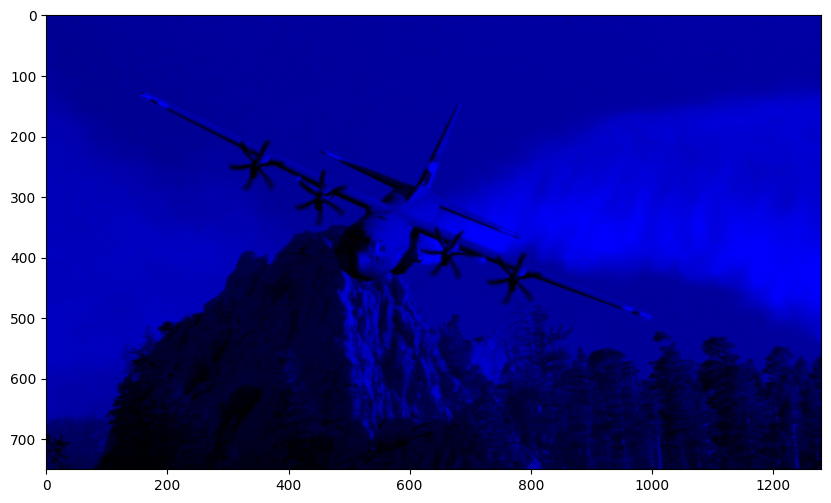

In [13]:
# assign the image to a new variable 
image_badCopy = image

# edit the new image variable
image_badCopy[:,:,0] = 0
image_badCopy[:,:,1] = 0

# display the old image variable 
plt.figure(figsize=(10,10))
plt.imshow(image, cmap='gray')
plt.plot()

We edited the *new* variable, but when we display the *old* variable we can see that it has been changed too! 

Instead, this is how you create an independent copy: 

[]

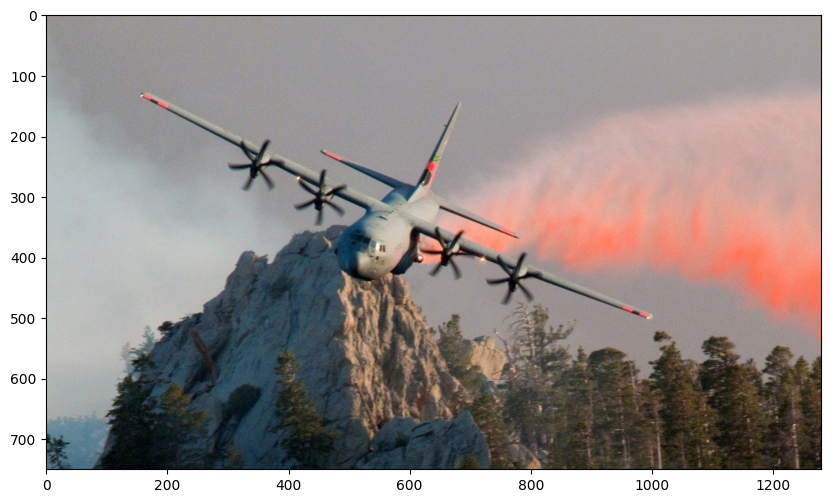

In [14]:
# assign the image to a new variable 
image_goodCopy = image_corrected.copy()

# edit the new image variable
image_goodCopy[:,:,0] = 0
image_goodCopy[:,:,1] = 0

# display the old image variable 
plt.figure(figsize=(10,10))
plt.imshow(image_corrected, cmap='gray')
plt.plot()

Now, you can see that the variables are independent. We edited the *new* variable and displayed the *old* variable. The displayed image does not show any of our edits.

### Note on numpy

You may have noticed that we imported the numpy library at the beginning. This is a package that can be used for advanced calculations, like working with matrices. 

Why did we import this library? Well, because your image is stored as a numpy array. See below - 

In [17]:
type(image_corrected)

numpy.ndarray

Remember when we performed numpy functions like min() and max() on our image? Well, we can do so much more! You can use this numpy array to perform other operations like...
- Getting the negative of an image - see [here](https://dioph.github.io/casual-code/manipulating-opencv-images-using-numpy-arrays/)
- Adding and subtracting images - see [here](https://www.meccanismocomplesso.org/en/opencv-python-arithmetic-operations-on-images-and-image-blending/)
- Setting an image ROI (Region of Interest) - see [here](https://docs.opencv.org/4.x/d3/df2/tutorial_py_basic_ops.html)

### References and documentation  
- Image from [Seven Critical U.S. National Guard Missions](https://www.lockheedmartin.com/en-us/news/features/2023/seven-critical-u-s-national-guard-missions.html)
- Documentation here: 
    - [Operations with images](https://docs.opencv.org/4.x/d5/d98/tutorial_mat_operations.html)
    - [Basic Operations on Images](https://docs.opencv.org/4.x/d3/df2/tutorial_py_basic_ops.html)